In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:
# Step 1: Load and explore data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [5]:

# Display the first few rows of the dataset
print("Train data preview:")
print(train_data.head())
print("\nTest data preview:")
print(test_data.head())


Train data preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0

In [6]:
# Display the last few rows of the dataset
print("Train data preview:")
print(train_data.tail())
print("Test data preview:")
print(test_data.tail())

Train data preview:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCo

In [7]:
# Step 2: Data preprocessing 
# Check for missing values in both train and test datasets
print("Missing values in training data:")
print(train_data.isnull().sum())
print("Missing values in test data:")
print(test_data.isnull().sum())



Missing values in training data:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Missing values in test data:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [9]:
# Fill missing values with mean for numeric columns
numeric_cols_train = train_data.select_dtypes(include=np.number).columns.tolist()
train_data[numeric_cols_train] = train_data[numeric_cols_train].fillna(train_data[numeric_cols_train].mean())

numeric_cols_test = test_data.select_dtypes(include=np.number).columns.tolist()
test_data[numeric_cols_test] = test_data[numeric_cols_test].fillna(test_data[numeric_cols_test].mean())


In [10]:
# Step 3: Feature selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = train_data[features]
y = train_data[target]


In [11]:
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Step 4: Model building
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Step 5: Model evaluation on training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")


Training RMSE: 50924.807621834334
Training MAE: 34917.38695768715
Validation RMSE: 52975.71771338122
Validation MAE: 35788.0612924363


In [20]:

# Step 6: Prediction on testing data
X_test = test_data[features]
y_test_pred = model.predict(X_test)

# Output predictions for submission (test set)
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")

#Display first few rows of generated csv file
print(submission.head())
#Display last few rows of generated csv file
print(submission.tail())

Predictions saved to submission.csv
     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106
        Id      SalePrice
1454  2915  115907.303921
1455  2916  115907.303921
1456  2917  102983.611090
1457  2918  103216.094466
1458  2919  240377.514797


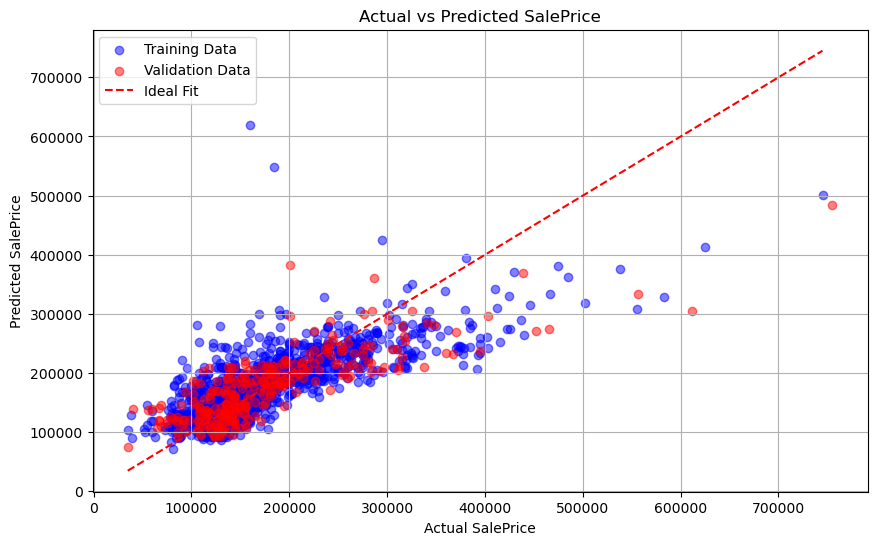

In [22]:
# Scatter plot of Actual vs Predicted SalePrice on the training and validation data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Training Data')
plt.scatter(y_val, y_val_pred, color='red', alpha=0.5, label='Validation Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.show()